In [1]:
import pandas as pd


import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [2]:
print("All packages imported successfully!")

All packages imported successfully!


In [3]:
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.3.0


### Working with Jupyter Notebook

#### Data Loading

In [4]:
df = pd.read_csv('UNRATE.csv')

In [8]:
print(df.columns)

Index(['observation_date', 'UNRATE'], dtype='object')


In [9]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [10]:
print("Dataset shape:", df.shape)

Dataset shape: (928, 2)


In [12]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [13]:
print("Data types:")
print(df.dtypes)
print("\nBasic statistics:")
df['UNRATE'].describe()

Data types:
observation_date    datetime64[ns]
UNRATE                     float64
dtype: object

Basic statistics:


count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

In [16]:
max_unrate = df['UNRATE'].max()
max_date = df[df['UNRATE'] == max_unrate]['observation_date'].values[0]
print(f"Max unemployment rate: {max_unrate}% on {max_date}")


Max unemployment rate: 14.8% on 2020-04-01T00:00:00.000000000


### Part 5: Business Data Analysis

In [21]:
df = df.rename(columns={'observation_date': 'DATE'})

In [22]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (928, 3)

First 5 rows:
        DATE  UNRATE  Year
0 1948-01-01     3.4  1948
1 1948-02-01     3.8  1948
2 1948-03-01     4.0  1948
3 1948-04-01     3.9  1948
4 1948-05-01     3.5  1948

Data types:
DATE      datetime64[ns]
UNRATE           float64
Year               int32
dtype: object


#### Statistical Analysis

In [ ]:
#overall employment rate
print("\nBasic statistics:")
df['UNRATE'].describe()


Basic statistics:


count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

In [25]:
#Find minimum and maximum unemployment rates with their dates
# Max unemployment rate
max_row = df.loc[df['UNRATE'].idxmax()]
max_rate = max_row['UNRATE']
max_date = max_row['DATE'].strftime('%Y-%m-%d')

# Min unemployment rate
min_row = df.loc[df['UNRATE'].idxmin()]
min_rate = min_row['UNRATE']
min_date = min_row['DATE'].strftime('%Y-%m-%d')

# Display results
print(f"Maximum unemployment rate: {max_rate}% on {max_date}")
print(f"Minimum unemployment rate: {min_rate}% on {min_date}")


Maximum unemployment rate: 14.8% on 2020-04-01
Minimum unemployment rate: 2.5% on 1953-05-01


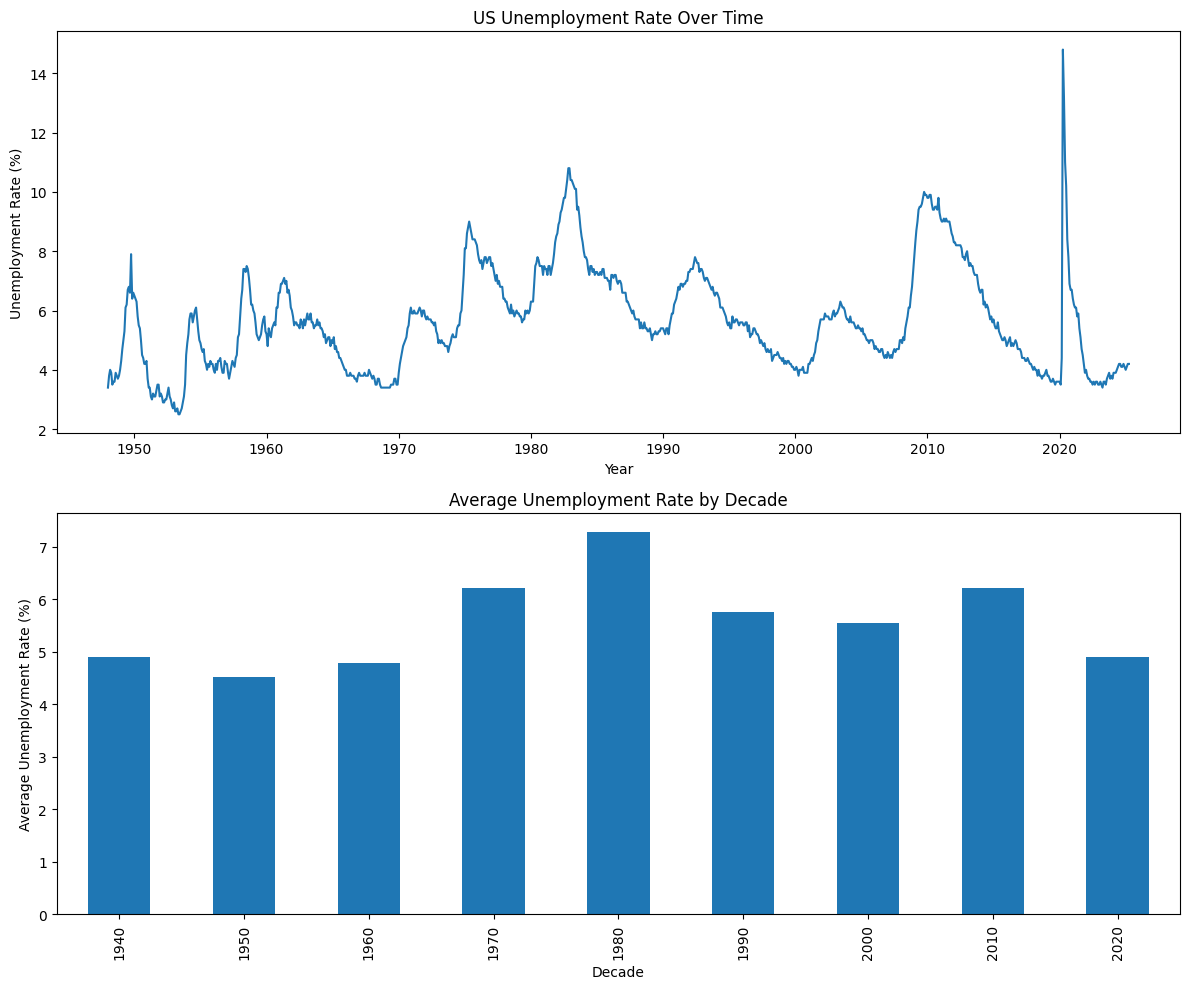

In [ ]:
#Calculate unemployment statistics by decade (1950s, 1960s, etc.)
df['Decade'] = (df['DATE'].dt.year // 10) * 10
decade_avg = df.groupby('Decade')['UNRATE'].mean()

# Create visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Time series plot
ax1.plot(df['DATE'], df['UNRATE'])
ax1.set_title('US Unemployment Rate Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)')

# Decade averages
decade_avg.plot(kind='bar', ax=ax2)
ax2.set_title('Average Unemployment Rate by Decade')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Average Unemployment Rate (%)')
plt.tight_layout()
plt.savefig('unemployment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Extract the year from the DATE column
df['Year'] = df['DATE'].dt.year

# Group by year and compute average unemployment rate
yearly_avg = df.groupby('Year')['UNRATE'].mean()

# Find the year with the highest average
max_year = yearly_avg.idxmax()
max_rate = yearly_avg.max()

# Display result
print(f"The year with the highest average unemployment rate is {int(max_year)} with an average rate of {max_rate:.2f}%")


The year with the highest average unemployment rate is 1982 with an average rate of 9.71%


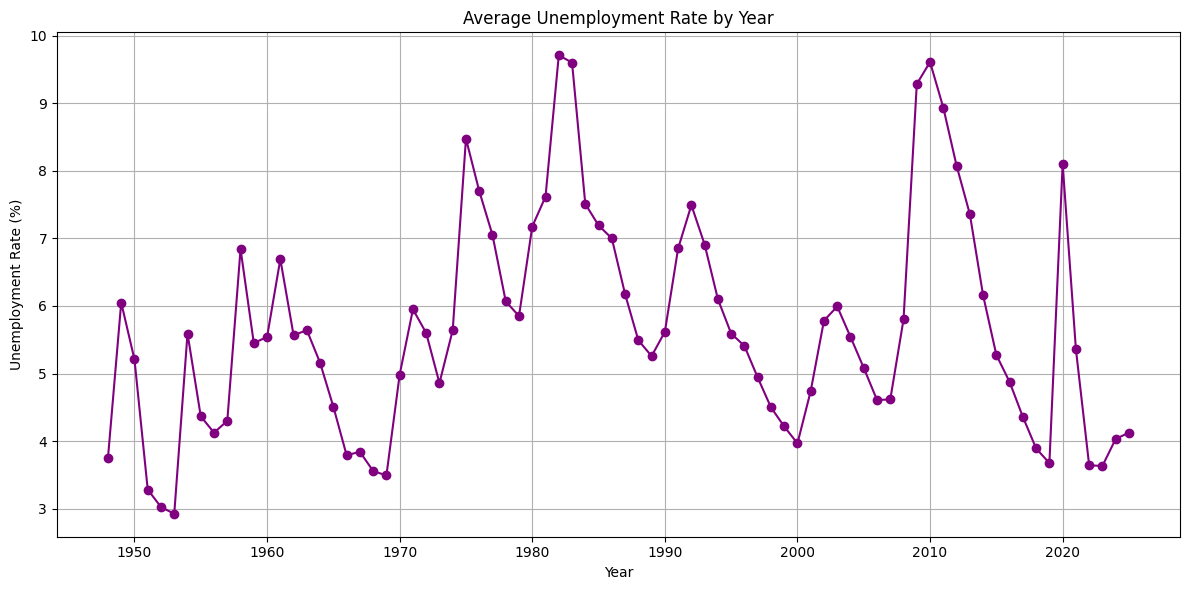

In [ ]:
# Create the plot for average unemployment rate over the year
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='purple')
plt.title('Average Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()


plt.savefig('average_unemployment_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
avg_2015 = df[df['Year'] == 2015]['UNRATE'].mean()
avg_2025 = df[df['Year'] == 2025]['UNRATE'].mean()

In [32]:
print(f"Average unemployment rate in 2015: {avg_2015:.2f}%")
print(f"Average unemployment rate in 2025: {avg_2025:.2f}%")

Average unemployment rate in 2015: 5.28%
Average unemployment rate in 2025: 4.12%


In [35]:
# Calculate standard deviation of unemployment rates by decade
decade_std = df.groupby('Decade')['UNRATE'].std()

# Display the result
print(decade_std)


Decade
1940    1.380926
1950    1.285614
1960    1.072176
1970    1.163425
1980    1.481083
1990    1.049294
2000    1.447199
2010    2.061365
2020    2.282751
Name: UNRATE, dtype: float64
